In [ ]:
# relation between skills

#imbalanced data
#sample weight
# look at the confusion matrix (accuracy, recall, pressision, F1)

In [6]:
DF_PATH = "../data/processed/1_processed_df.pkl"

NA_STRING = 'Not Specified'
TRANSPARENT_STRING = 'rgba(0, 0, 0, 0)'

ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageWorkedWith',
                  'DatabaseWorkedWith',
                  'WebframeWorkedWith',
                  'MiscTechWorkedWith',]

EXPORT_FEATURES_DIR = "../data/processed/"

In [53]:
# Load packages
import pandas as pd 
import numpy as np
import logging
import pickle
import os
import yaml

import plotly 
import plotly.graph_objects as go
import plotly.express as px

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.manifold import TSNE

from sklearn.pipeline import make_pipeline
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split

from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import silhouette_score

pd.options.display.max_rows = 1000

## Read and process data

In [15]:
df = pd.read_pickle(DF_PATH)
df.sample(1)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
6142,6167,I am a developer by profession,No,39.0,4.0,NaN,NaN,NaN,United Arab Emirates,United Arab Emirates dirham,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...","[Angular.js, ASP.NET, jQuery]","[Angular.js, ASP.NET, jQuery]",Just as welcome now as I felt last year,40.0,27.0,13.0


### one hot encoding

In [21]:
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(df[col]),
                               columns=binarizer.classes_,
                               index=df[col].index)
    encoded_dfs[col] = encoded_df
    
# Merge 1-hot encoded 
ohe_df = pd.concat(encoded_dfs, axis=1)

In [26]:
# ohe_df.columns.unique().tolist

## Dimensionality Reduction

In [27]:
# applying trandsform
ohe_skills = ohe_df.drop("DevType", axis = 1).copy()
std_skills = StandardScaler().fit_transform(ohe_skills)

In [37]:
pd.DataFrame(std_skills)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.241524,-0.646001,-0.490158,1.604066,-0.519680,-0.191487,-0.291173,0.884096,-0.139009,-0.746671,...,-0.688771,-0.327758,-0.121976,-0.278051,-0.278892,-0.201619,-0.172943,-0.271093,-0.144364,-0.194814
1,-0.241524,-0.646001,-0.490158,-0.623416,-0.519680,-0.191487,-0.291173,-1.131099,-0.139009,-0.746671,...,-0.688771,-0.327758,-0.121976,3.596457,-0.278892,-0.201619,-0.172943,-0.271093,-0.144364,-0.194814
2,-0.241524,-0.646001,-0.490158,-0.623416,-0.519680,-0.191487,-0.291173,-1.131099,-0.139009,-0.746671,...,-0.688771,-0.327758,-0.121976,-0.278051,-0.278892,-0.201619,-0.172943,-0.271093,-0.144364,-0.194814
3,-0.241524,-0.646001,-0.490158,-0.623416,-0.519680,-0.191487,-0.291173,-1.131099,-0.139009,-0.746671,...,-0.688771,-0.327758,-0.121976,-0.278051,-0.278892,-0.201619,-0.172943,-0.271093,-0.144364,-0.194814
4,-0.241524,-0.646001,-0.490158,-0.623416,-0.519680,-0.191487,-0.291173,0.884096,-0.139009,-0.746671,...,-0.688771,-0.327758,-0.121976,-0.278051,-0.278892,-0.201619,-0.172943,-0.271093,-0.144364,-0.194814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,-0.241524,-0.646001,-0.490158,-0.623416,-0.519680,-0.191487,-0.291173,-1.131099,-0.139009,-0.746671,...,-0.688771,-0.327758,-0.121976,-0.278051,-0.278892,-0.201619,-0.172943,-0.271093,-0.144364,-0.194814
64457,4.140374,1.547986,2.040159,1.604066,1.924261,5.222295,3.434379,0.884096,7.193776,1.339277,...,-0.688771,-0.327758,-0.121976,-0.278051,-0.278892,-0.201619,-0.172943,-0.271093,-0.144364,-0.194814
64458,-0.241524,-0.646001,-0.490158,-0.623416,-0.519680,-0.191487,-0.291173,-1.131099,-0.139009,-0.746671,...,-0.688771,-0.327758,-0.121976,-0.278051,-0.278892,-0.201619,-0.172943,-0.271093,-0.144364,-0.194814
64459,-0.241524,-0.646001,-0.490158,-0.623416,-0.519680,-0.191487,-0.291173,0.884096,-0.139009,-0.746671,...,-0.688771,-0.327758,-0.121976,-0.278051,-0.278892,-0.201619,-0.172943,-0.271093,-0.144364,-0.194814


In [42]:
tsne_projection = TSNE(n_components=2, 
                       perplexity=3,
                       learning_rate=0.01,
                       init='pca', 
                       method='barnes_hut', 
                       n_jobs=2, 
                       # n_iter=10**10,
                       max_iter=1000,
                       random_state=0).fit_transform(std_skills.T)

tsne_projection = pd.DataFrame(tsne_projection, index=ohe_skills.columns)

In [43]:
tsne_projection.shape

(74, 2)

In [74]:
tsne_projection

0         1
LanguageWorkedWith Assembly              -1.120309  5.987400
                   Bash/Shell/PowerShell  1.124465  4.017153
                   C                     -1.505805  5.902584
                   C#                    -7.451533  3.586740
                   C++                   -1.637120  5.895649
                   Dart                   0.675304 -1.698354
                   Go                     5.779457 -0.133522
                   HTML/CSS              -5.415148 -2.848174
                   Haskell                1.223132  8.076505
                   Java                  -2.977885  0.962673
                   JavaScript            -5.466316 -3.058780
                   Julia                  2.458702  7.651702
                   Kotlin                -2.157975  0.603036
                   Objective-C            0.154494  0.797789
                   PHP                   -2.573827 -4.633777
                   Perl                   0.580047  4.026206
                   Python                 2.668434  4.058812
                   R                      3.503450  6.513935
                   Ruby                   4.869309 -5.064972
                   Rust                   1.103690  8.119033
                   SQL                   -5.071936 -1.952647
                   Scala                  8.312472  2.934827
                   Swift                  0.149885  0.770389
                   TypeScript            -7.015679 -6.227609
                   VBA                   -8.030411  1.626248
DatabaseWorkedWith Cassandra              8.419469  1.876567
                   Couchbase              8.555437  1.310830
                   DynamoDB               5.784394 -1.852844
                   Elasticsearch          4.812375 -0.904741
                   Firebase               0.919129 -2.183751
                   IBM DB2               -4.477751  1.285822
                   MariaDB               -1.954775 -4.319370
                   Microsoft SQL Server  -7.881102  2.203378
                   MongoDB               -0.113209 -8.489212
                   MySQL                 -2.613608 -3.775025
                   Oracle                -3.947154  1.145084
                   PostgreSQL             4.025117 -0.581453
                   Redis                  4.616666 -0.743474
                   SQLite                -2.337836 -2.793757
WebframeWorkedWith ASP.NET               -7.941854  3.183255
                   ASP.NET Core          -7.802235  4.854363
                   Angular               -7.291800 -6.243656
                   Angular.js            -7.694628 -5.847773
                   Django                 2.895611  3.650641
                   Drupal                -3.649695 -5.585867
                   Express                0.188339 -7.989351
                   Flask                  2.907653  3.904191
                   Gatsby                 1.991373 -7.747090
                   Laravel               -2.165279 -5.226981
                   React.js               1.356786 -7.309257
                   Ruby on Rails          4.857725 -5.082635
                   Spring                -3.081399  1.019954
                   Symfony               -3.277419 -5.215309
                   Vue.js                -1.476786 -6.188029
                   jQuery                -5.763324 -3.458431
MiscTechWorkedWith .NET                  -7.637130  3.366332
                   .NET Core             -7.617239  4.809472
                   Ansible                6.878699 -1.590457
                   Apache Spark           8.194995  3.527924
                   Chef                   8.406777 -2.657215
                   Cordova               -7.710857 -6.917508
                   Flutter                0.716769 -1.786655
                   Hadoop                 8.170087  3.622314
                   Keras                  4.987018  5.944755
                   Node.js                0.301551 -7.769739
                   Pand

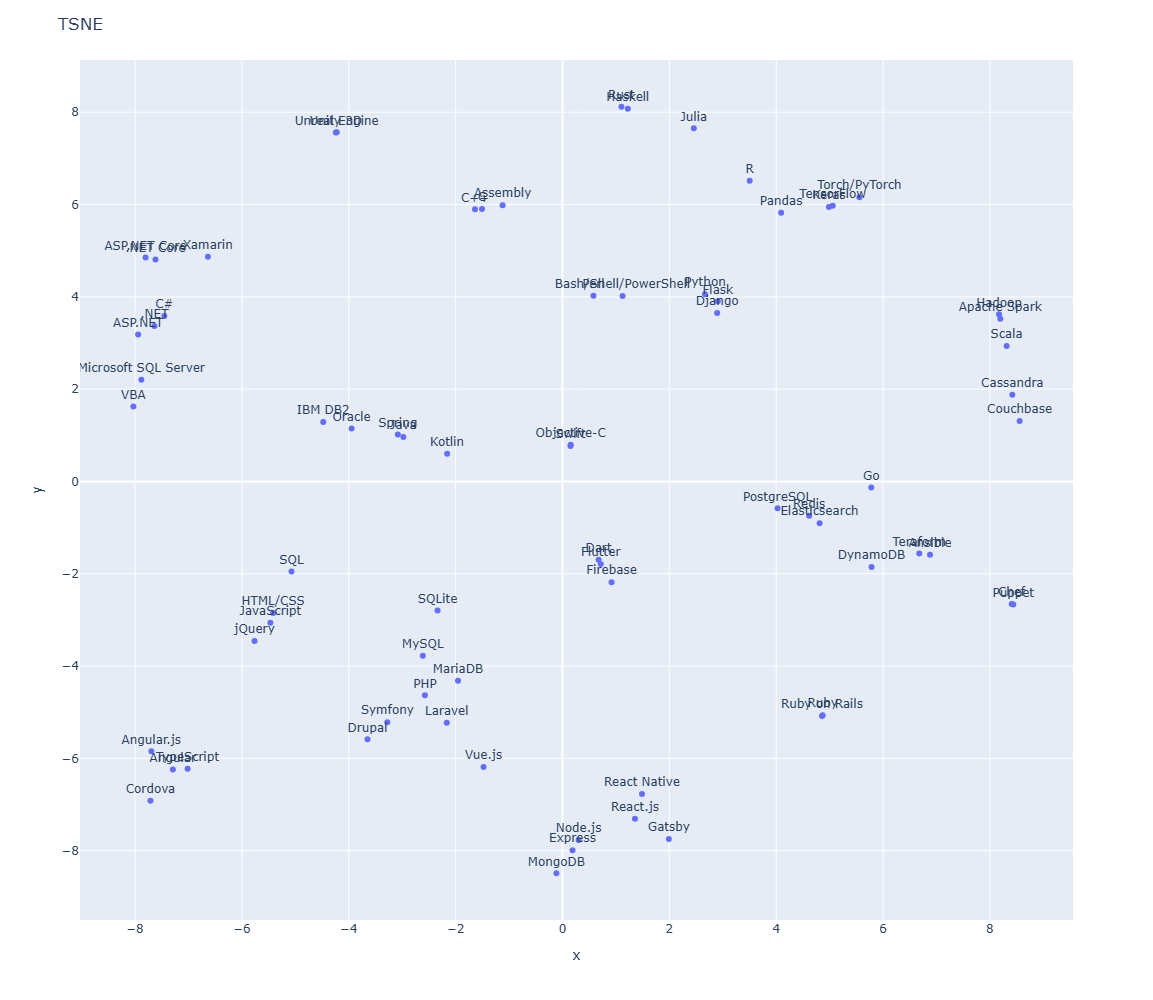

In [46]:
fig = px.scatter(x=tsne_projection[0], y=tsne_projection[1], text=tsne_projection.droplevel(0).index)
fig.update_traces(textposition='top center')
fig.update_layout(height=1000, width=1000, title_text='TSNE')
fig.show()

## Cluster

In [54]:
rang_n_cluster = range(10,25)
silhouette_scores = []
best_cluster_model = None

for n_clusters in rang_n_cluster:
    cluster_model = AgglomerativeClustering(n_clusters =n_clusters , linkage = 'ward')
    cluster_labels = cluster_model.fit_predict(tsne_projection)

    silhouette_score_avg = silhouette_score(tsne_projection, cluster_labels)
    silhouette_scores += [silhouette_score_avg]

    if silhouette_score_avg >= np.max(silhouette_scores):
        best_cluster_model = cluster_model
    

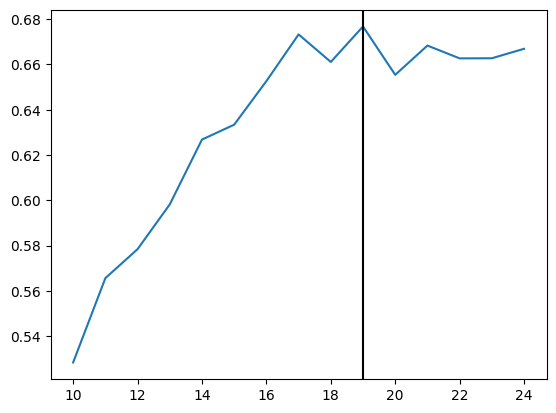

In [57]:
plt.plot(rang_n_cluster, silhouette_scores)
plt.axvline(best_cluster_model.n_clusters, color='black')

In [58]:
cluster_labels = ["skills_group_" + str(label) 
                 for label in best_cluster_model.labels_]

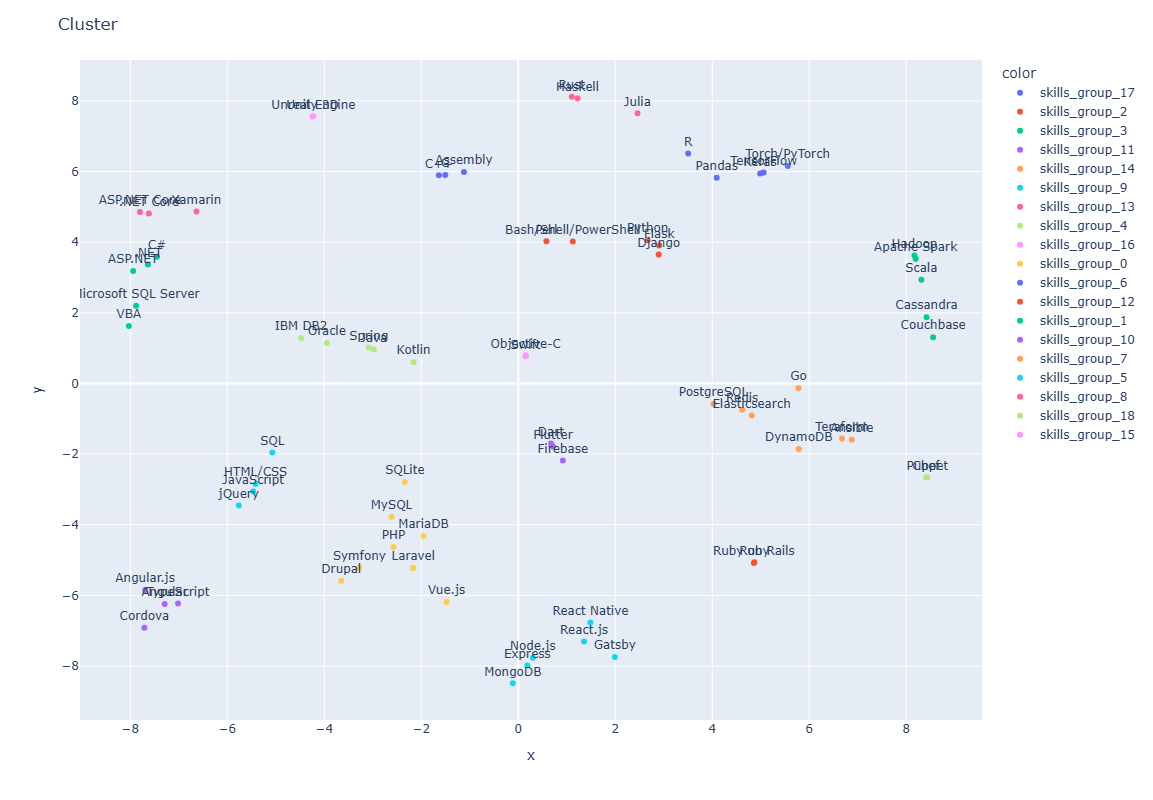

In [59]:
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.droplevel(0).index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

In [60]:
# How to better write this
skills_clusters = tsne_projection.index.droplevel(0).to_series().groupby(cluster_labels).apply(list)

In [79]:
for cluster, skills in skills_clusters.items():
    print(cluster)
    print(skills)

skills_group_0
['PHP', 'MariaDB', 'MySQL', 'SQLite', 'Drupal', 'Laravel', 'Symfony', 'Vue.js']
skills_group_1
['Scala', 'Cassandra', 'Couchbase', 'Apache Spark', 'Hadoop']
skills_group_10
['TypeScript', 'Angular', 'Angular.js', 'Cordova']
skills_group_11
['Dart', 'Firebase', 'Flutter']
skills_group_12
['Ruby', 'Ruby on Rails']
skills_group_13
['Haskell', 'Julia', 'Rust']
skills_group_14
['Go', 'Elasticsearch', 'PostgreSQL', 'Redis']
skills_group_15
['Unity 3D', 'Unreal Engine']
skills_group_16
['Objective-C', 'Swift']
skills_group_17
['Assembly', 'C', 'C++']
skills_group_18
['Chef', 'Puppet']
skills_group_2
['Bash/Shell/PowerShell', 'Perl', 'Python', 'Django', 'Flask']
skills_group_3
['C#', 'VBA', 'Microsoft SQL Server', 'ASP.NET', '.NET']
skills_group_4
['Java', 'Kotlin', 'IBM DB2', 'Oracle', 'Spring']
skills_group_5
['MongoDB', 'Express', 'Gatsby', 'React.js', 'Node.js', 'React Native']
skills_group_6
['R', 'Keras', 'Pandas', 'TensorFlow', 'Torch/PyTorch']
skills_group_7
['DynamoDB',

## Create new features

In [89]:
skills

['HTML/CSS', 'JavaScript', 'SQL', 'jQuery']

In [90]:
ohe_skills.droplevel(0,axis=1)[skills]

,HTML/CSS,JavaScript,SQL,jQuery
0,1,1,0,0
1,0,1,0,0
2,0,0,0,0
3,0,0,0,0
4,1,0,1,0
...,...,...,...,...
64456,0,0,0,0
64457,1,1,1,0
64458,0,0,0,0
64459,1,0,0,0


In [92]:
#For each row (each developer), create a new feature that says
# “How many skills from this cluster does the person have?”
# Takes your one-hot encoded skills
#✔️ Groups them by skill clusters
#✔️ Counts how many skills from each cluster each user has
#✔️ Creates new features
new_features = []

for cluster, skills in skills_clusters.items():
    cluster_sum = ohe_skills.droplevel(0, axis=1)[skills].sum(axis=1)
    cluster_sum.name = cluster
    new_features.append(cluster_sum)

fe_clustered_skills = pd.concat(new_features, axis=1)


In [82]:
fe_clustered_skills

,skills_group_0,skills_group_1,skills_group_10,skills_group_11,skills_group_12,skills_group_13,skills_group_14,skills_group_15,skills_group_16,skills_group_17,skills_group_18,skills_group_2,skills_group_3,skills_group_4,skills_group_5,skills_group_6,skills_group_7,skills_group_8,skills_group_9
0,0,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0,2,2
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64457,4,3,1,2,1,3,4,0,2,3,0,3,3,4,1,1,1,0,3
64458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64459,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## Illustration Model
### Create train / test matrices

In [94]:
combined_features_df = pd.concat([fe_clustered_skills, 
                                  ohe_skills.droplevel(0,axis=1)], 
                                 axis=1)
roles_df = ohe_df['DevType'].copy()

In [97]:
X_train, X_test, y_train,y_test = train_test_split(combined_features_df, roles_df, test_size=0.3, random_state=0)

### Compute samples weight to deal with classes imbalance

In [99]:
# Assign class weight as an inverse of its frequency 
class_weight = (1/d)

,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",...,"Developer, mobile",Educator,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Scientist,Senior executive/VP,System administrator
45093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37712,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
48567,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
21851,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4521,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42613,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
43567,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
